In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [12]:
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


***Surprisal & RegOut (N+1) ***

In [ ]:
datafile = 'data/glmerSurprisalLenFreqRegOutPlusOne_predicted_regressions.csv'
df = pd.read_csv(datafile)

*Descriptive Stats*

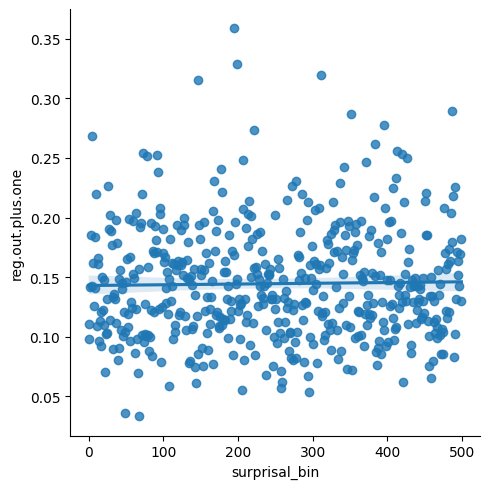

In [ ]:
# df_sample = df.sample(1000)
q = 500
# df['surprisal_bin'] = pd.qcut(df_sample['surprisal'], q=3, labels=['1','2','3'])
df['surprisal_bin'] = pd.qcut(df['surprisal'], q=q, labels=[x for x in range(q)])
df_grouped = df.groupby('surprisal_bin', as_index=False)['reg.out.plus.one'].mean()
# sns.catplot(data=df_grouped, x="surprisal_bin", y="reg.out.plus.one", order=['1','2','3'])
sns.lmplot(data=df_grouped, x="surprisal_bin", y="reg.out.plus.one")
# define x and y ticks

<Axes: xlabel='surprisal', ylabel='reg.out.plus.one'>

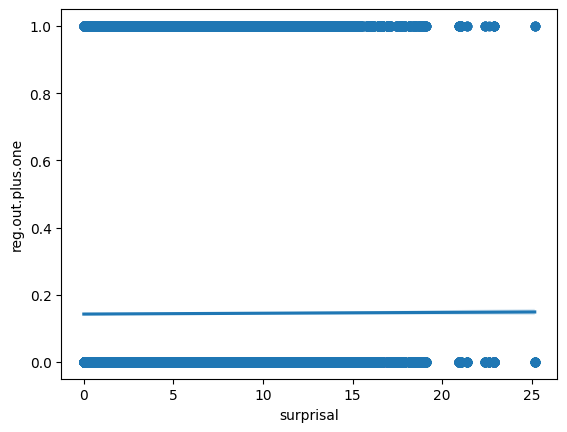

In [ ]:
sns.regplot(data=df, x='surprisal', y='reg.out.plus.one', logistic=True)

*Inference Stats*

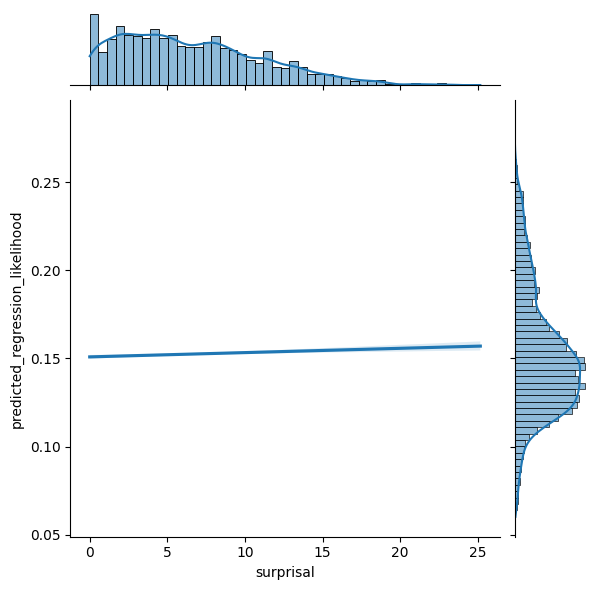

In [ ]:
graph = sns.jointplot(data=df, x="surprisal", y="predicted_regression_likelihood", kind='reg', scatter=False)
graph.savefig("surprisal_regOut_n+1.png", dpi=300)

*** Surprisal, Distance & RegOut (N+1) ***

In [ ]:
datafile = 'data/glmerSurprisalLenFreqRegOutDistIntPlusOne_predicted_regressions.csv'
df = pd.read_csv(datafile)
df.head()

,Unnamed: 0,X,uniform_id,trialid,fixid,ia,ianum,skip,dur,xs,...,length.log,frequency,reg.out.plus.one,reg.dist.log.plus.one,reg.dist.binned.plus.one,reg.out.plus.two,reg.dist.log.plus.two,reg.dist.binned.plus.two,surprisal,predicted_regression_likelihood
0,1,0,en_10,1,2,ancient,2,1,253,154,...,1.945910,4.862520,0,1.840582,NoDistance,0.0,1.840582,NoDistance,13.877058,0.048008
1,2,1,en_10,1,3,Roman,3,1,211,258,...,1.609438,5.100278,0,1.840582,NoDistance,0.0,1.840582,NoDistance,8.865258,0.050697
2,3,2,en_10,1,4,religion,4,1,83,403,...,2.079442,4.786566,0,1.840582,NoDistance,0.0,1.840582,NoDistance,11.245405,0.047580
3,4,3,en_10,1,5,religion,4,0,196,475,...,2.079442,4.786566,0,1.840582,NoDistance,0.0,1.840582,NoDistance,11.245405,0.047580
4,5,4,en_10,1,6,"myth,",6,1,245,592,...,1.609438,3.972860,0,1.840582,NoDistance,0.0,1.840582,NoDistance,7.309352,0.051772


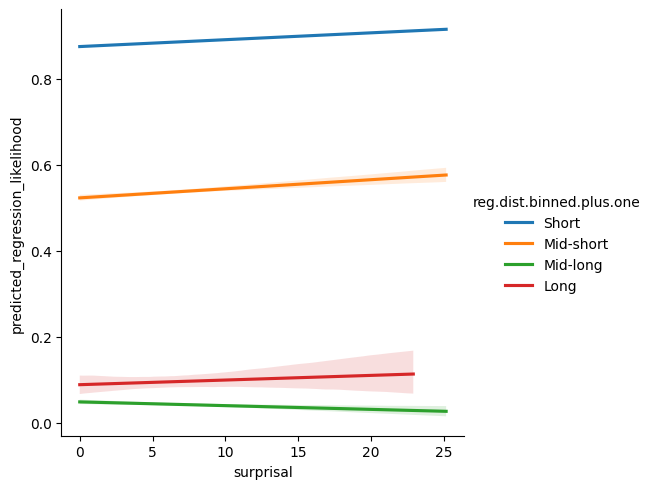

In [ ]:
graph = sns.lmplot(data=df.loc[df['reg.dist.binned.plus.one']!='NoDistance'], x="surprisal", y="predicted_regression_likelihood", hue='reg.dist.binned.plus.one', hue_order=['Short','Mid-short','Mid-long','Long'], scatter=False)
# graph.set(ylim=(0.10, 0.20))
graph.savefig("surprisal_regOut_distanceBins.png", dpi=300)

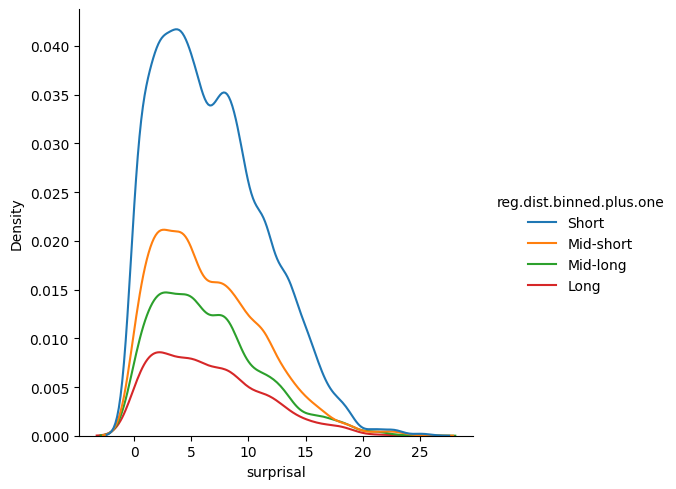

In [ ]:
# distribution of data points
graph = sns.displot(data=df.loc[df['reg.dist.binned.plus.one']!='NoDistance'], x="surprisal", hue='reg.dist.binned.plus.one', hue_order=['Short','Mid-short','Mid-long','Long'], kind="kde")
graph.savefig("dist_surprisal_distances.png", dpi=300)

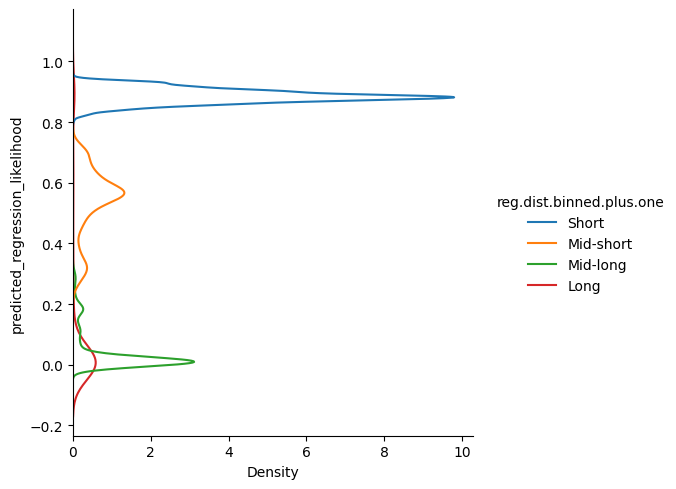

In [ ]:
# distribution of data points
graph = sns.displot(data=df.loc[df['reg.dist.binned.plus.one']!='NoDistance'], y="predicted_regression_likelihood", hue='reg.dist.binned.plus.one', hue_order=['Short','Mid-short','Mid-long','Long'], kind="kde")
graph.savefig("dist_regOut_distances.png", dpi=300)

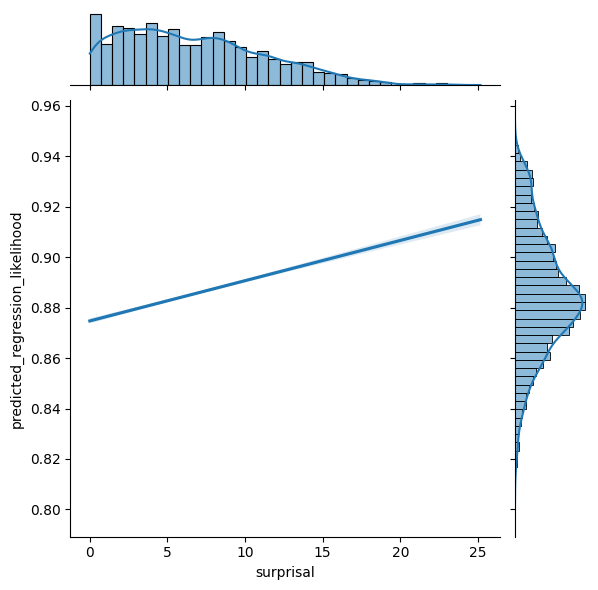

In [ ]:
# separate distances and use joint.plot to have distributions
df_short = df.loc[df['reg.dist.binned.plus.one']=='Short']
graph = sns.jointplot(data=df_short, x="surprisal", y="predicted_regression_likelihood", kind='reg', scatter=False)
graph.savefig('surprisal_short_distance.png', dpi=300)

<ipython-input-46-14c97354a797>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg.dist.binned.plus.one'] = df['reg.dist.binned.plus.one'].apply(lambda x : 'N-1' if x == 'Short' else x)
<ipython-input-46-14c97354a797>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reg.dist.binned.plus.one'] = df['reg.dist.binned.plus.one'].apply(lambda x : 'N-2' if x == 'Mid-short1' else x)
<ipython-input-46-14c97354a797>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

reg.dist.binned.plus.one
N-1    6490
N-2    2399
N-3     664
Name: count, dtype: int64


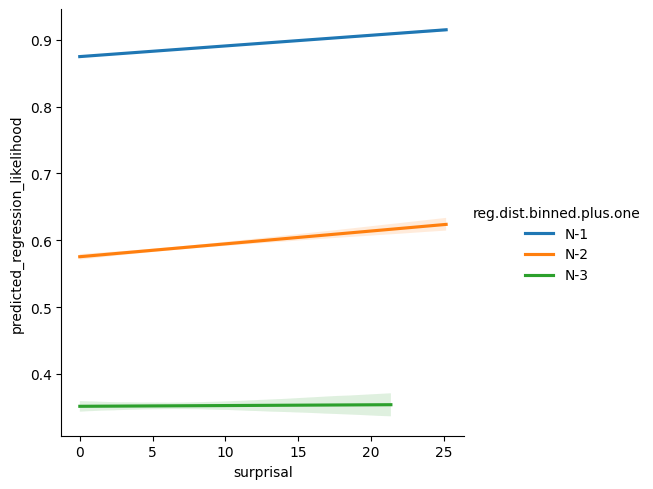

In [ ]:
def change_distance_name(row):
  if row['reg.dist.binned.plus.one'] == 'Mid-short':
    if row['reg.dist.log.plus.one'] == 0.693147180559945: # log distance 2
      row['reg.dist.binned.plus.one'] = 'Mid-short1'
    elif row['reg.dist.log.plus.one'] == 1.09861228866811: # log distance 3
      row['reg.dist.binned.plus.one'] = 'Mid-short2'
  return row

df = df.loc[df['reg.dist.binned.plus.one']!='NoDistance'].apply(change_distance_name, axis=1)
# print(df['reg.dist.binned.plus.one'].value_counts())
df = df.loc[(df['reg.dist.binned.plus.one'] == 'Short') | (df['reg.dist.binned.plus.one'] == 'Mid-short1') | (df['reg.dist.binned.plus.one'] == 'Mid-short2')]
df['reg.dist.binned.plus.one'] = df['reg.dist.binned.plus.one'].apply(lambda x : 'N-1' if x == 'Short' else x)
df['reg.dist.binned.plus.one'] = df['reg.dist.binned.plus.one'].apply(lambda x : 'N-2' if x == 'Mid-short1' else x)
df['reg.dist.binned.plus.one'] = df['reg.dist.binned.plus.one'].apply(lambda x : 'N-3' if x == 'Mid-short2' else x)
print(df['reg.dist.binned.plus.one'].value_counts())
graph = sns.lmplot(data=df, x="surprisal", y="predicted_regression_likelihood", hue='reg.dist.binned.plus.one', hue_order=['N-1','N-2','N-3'],scatter=False)
# graph.set(ylim=(0.10, 0.20))
graph.savefig('surprisal_regOut_shortDistances.png', dpi=300)

***Saliency & RegIn ***

In [18]:
datafile = 'data/glmerSaliencyLenFreqRegIn_predicted_regressions.csv'
df = pd.read_csv(datafile)
df.head()

,Unnamed: 0,X,uniform_id,trialid,ianum,ia,previous.ia,previous.ianum,reg.in,reg.dist.in,reg.dist.in.log,reg.dist.in.binned,length,frequency,saliency,predicted_regressionIn_likelihood
0,1,0,en_10,1,11,of,In,1,0,0,6.300203,NoDistance,2,7.284264,0.330524,0.033440
1,2,1,en_10,1,11,of,ancient,2,0,0,6.300203,NoDistance,7,4.862520,0.358433,0.034320
2,3,2,en_10,1,11,of,Roman,3,0,0,6.300203,NoDistance,5,5.100278,0.275684,0.021101
3,4,3,en_10,1,11,of,religion,4,0,0,6.300203,NoDistance,8,4.786566,0.229433,0.017929
4,5,4,en_10,1,11,of,and,5,0,0,6.300203,NoDistance,3,7.271098,0.109515,0.010778


<ipython-input-15-b3c615468210>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('saliency_bin', as_index=False)['reg.in'].mean()


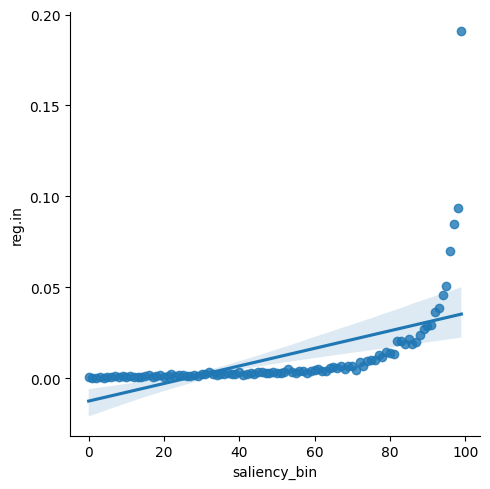

In [15]:
q = 100
df['saliency_bin'] = pd.qcut(df['saliency'], q=q, labels=[x for x in range(q)])
df_grouped = df.groupby('saliency_bin', as_index=False)['reg.in'].mean()
sns.lmplot(data=df_grouped, x="saliency_bin", y="reg.in")
# define x and y ticks

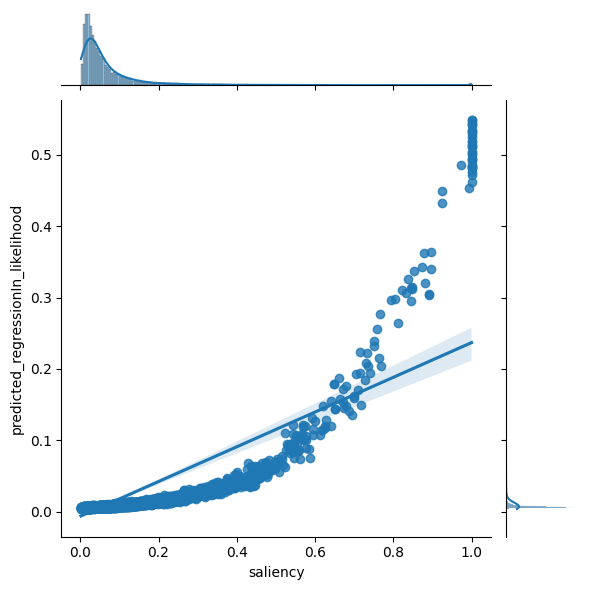

In [22]:
df_sample = df.sample(10000)
graph = sns.jointplot(data=df_sample, x="saliency", y="predicted_regressionIn_likelihood", kind="reg")
graph.savefig('saliency_regIn.png', dpi=300)

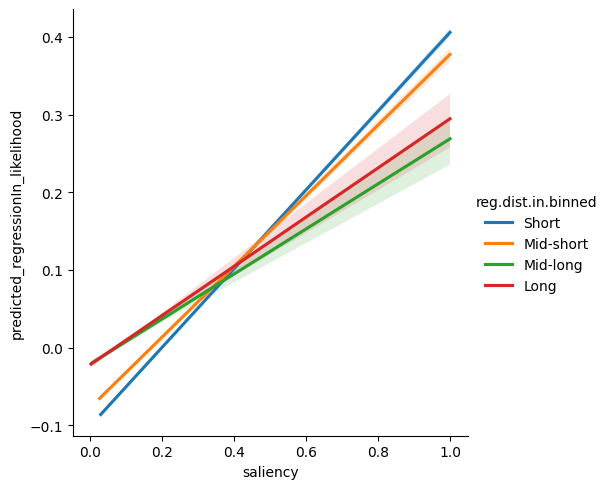

In [21]:
graph = sns.lmplot(data=df.loc[df['reg.dist.in.binned']!='NoDistance'], x="saliency", y="predicted_regressionIn_likelihood", hue='reg.dist.in.binned', hue_order=['Short','Mid-short','Mid-long','Long'], scatter=False)
# graph.set(ylim=(0.10, 0.20))
graph.savefig("saliency_regIn_distanceBins.png", dpi=300)

In [23]:
datafile = 'data/regression_importance.csv'
df = pd.read_csv(datafile)
df.head()

,Unnamed: 0,uniform_id,trialid,ianum,ia,previous.ia,previous.ianum,reg.in,reg.dist.in,reg.dist.in.log,reg.dist.in.binned,length,saliency
0,0,en_10,1.0,11.0,of,In,1,0,0.0,6.300203,NoDistance,2,0.330524
1,1,en_10,1.0,11.0,of,ancient,2,0,0.0,6.300203,NoDistance,7,0.358433
2,2,en_10,1.0,11.0,of,Roman,3,0,0.0,6.300203,NoDistance,5,0.275684
3,3,en_10,1.0,11.0,of,religion,4,0,0.0,6.300203,NoDistance,8,0.229433
4,4,en_10,1.0,11.0,of,and,5,0,0.0,6.300203,NoDistance,3,0.109515


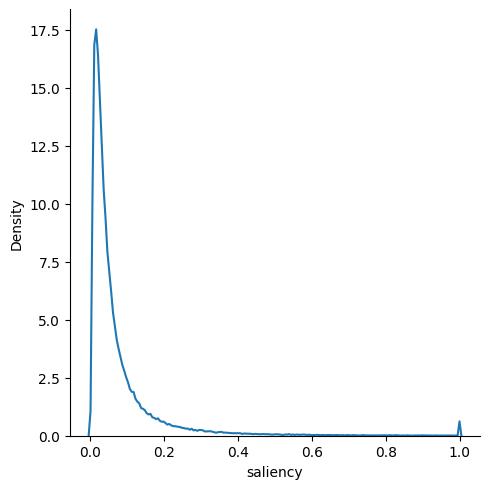

In [ ]:
graph = sns.displot(data=df, x="saliency", kind="kde", bw_adjust=0.25)

In [ ]:
df.loc[df['reg.dist.in.binned']!='NoDistance']['reg.dist.in.binned'].value_counts()

reg.dist.in.binned
Short        6562
Mid-short    3080
Mid-long     2184
Long         1349
Name: count, dtype: int64

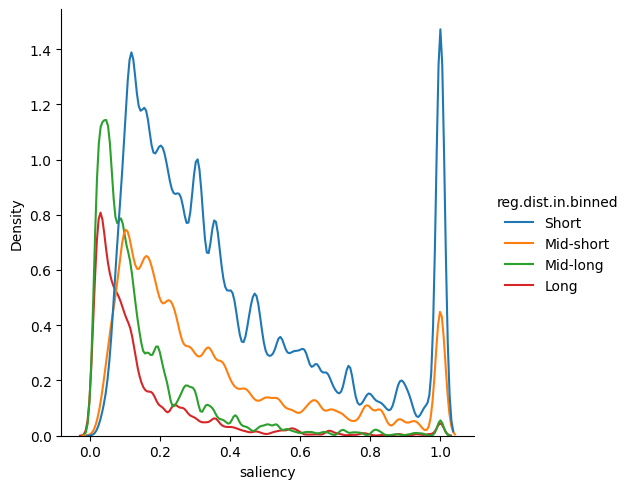

In [24]:
graph = sns.displot(data=df.loc[df['reg.dist.in.binned']!='NoDistance'], x="saliency", hue='reg.dist.in.binned', hue_order=['Short','Mid-short','Mid-long','Long'], kind="kde", bw_adjust=0.25)
graph.savefig('distr_saliency_regIn.png', dpi=300)